# Análisis de datos para la empresa Coursera

Desarrollado por: Nery Jiménez - 201700381
___

## Carga de datos provenientes de un archivo `*.csv` utilizando la herramienta `pandas`.


In [12]:
import pandas as pd
df = pd.read_csv('datos.csv')
df


,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,Approx. 7 hours to complete,Flexible schedule,36 reviews,NaN,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,NaN,NaN,77 reviews,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,Approx. 5 hours to complete,Flexible schedule,10 reviews,NaN,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1 hour,NaN,11 reviews,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


# Realizando limpieza de datos
Los datos proporcionados incluyen campos vacíos e información con nomenclatura confusa. Por lo que se debe realizar una limpieza de datos acorde a las necesidades de los informes que se deben reportar.

En este caso, se procede a eliminar los campos que se encuentran vacíos y se reemplazan por un 0 (cero). Para lograrlo, utilizaremos el método `fillna()` con el que detectaremos las casillas vacías y se reemplaza por algún valor, en este caso 0.

También editaremos la columna `Duration` para dejar únicamente los datos numéricos. Y este mismo proceso lo haremos en la columna `Review`. Para Duration, hemos creado una función que mediante una expresión regular detecta cadenas de texto en los registros, y los elimina, dejando únicamente el valor numérico. Y para Review, utilizamos un `str.replace()` para quitar el valor de reviews y dejar el valor numérico.

In [13]:
import re
df.fillna(0,inplace=True)

# Dejando únicamente los valores numéricos de la columna Duration
def convert_duration(duration_str):
    # Si el valor ya es un entero, devolverlo directamente
    if isinstance(duration_str, int):
        return duration_str

    # Buscando patrones específicos en el string
    match_hours = re.search(r'(\d+)\s*hour', str(duration_str))
    match_approx = re.search(r'Approx\.\s*(\d+)\s*hours?\s*to\s*complete', str(duration_str))
    
    if match_hours:
        return int(match_hours.group(1))
    elif match_approx:
        return int(match_approx.group(1))
    else:
        return None

# Aplicando la función a la columna 'Duration'
df['Duration'] = df['Duration'].apply(convert_duration)

# Eliminando la palabra 'reviews' de la columna Rewiew
df['Review'] = df['Review'].astype(str)
df['Review'] = df['Review'].str.replace(' reviews', '')

# Mostrando el resultado del dataframe
df

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20.0,Flexible schedule,"2,813",0,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,34.0,Flexible schedule,100,0,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9.0,Flexible schedule,227,0,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner level,8.0,Flexible schedule,0,0,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,11.0,Flexible schedule,582,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,Power Onboarding,4.1,Beginner level,7.0,Flexible schedule,36,0,[],"['Week 1 - Get Ready', 'Session 2 - Get Set', ...",['William J. White'],['Northwestern University'],Social Sciences,https://www.coursera.org/learn/power-onboarding
9591,Implementing Parent Feedback with Google Forms,4.9,Beginner level,0.0,0,77,Creating engaging parent surveys using Google ...,"['Education', 'online tools', 'engagement', 'e...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/education-fe...
9592,"""Making"" Progress Teach-Out",4.2,Beginner level,5.0,Flexible schedule,10,0,[],"['Week 1', 'WEEK 2']",['Pablo Palomino'],['Emory University'],Social Sciences,https://www.coursera.org/learn/makingprogress
9593,Use Microsoft PowerPoint to Create a Visual Sc...,4.5,Beginner level,1.0,0,11,Learn about choice boards and their use within...,"['Teaching tools', 'elementary teaching', 'eng...",['Learn step-by-step'],['Rachel Lindsay'],['Coursera Project Network'],Social Sciences,https://www.coursera.org/projects/use-microsof...


# Calculando promedio
Se nos solicita realizar el cálculo del promedio de calificaciones para cada curso. Por lo que necesitaremos agrupar los datos por el título del curso y posteriormente calcular el promedio de calificaciones por cada curso.

Primero nos aseguramos de que los datos sean del tipo numérico, procedemos a agruparlos por el título y obtenemos los promedios.

In [14]:
# Convirtiendo 'Rating' a tipo numérico
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Calculando el promedio para cada curso
promedio_calificaciones = df.groupby('Course Title')['Rating'].mean()

promedio_calificaciones

Course Title
 Assisting Public Sector Decision Makers With Policy Analysis                                                          4.8
 Atención prehospitalaria del ictus agudo y selección de pacientes para tratamiento endovascular con la escala RACE    4.9
 Build a social media presence for your business using Canva                                                           4.7
 Build social awareness content for Twitter with Canva                                                                 0.0
 Comercio, Inmigración y Tipos de Cambio en un Mundo Globalizado                                                       4.9
                                                                                                                      ... 
현대 로봇공학, 강좌 2: 로봇 기구학                                                                                                  0.0
현대 로봇공학, 강좌 3: 로봇 동역학                                                                                                  0.0
현대 

# Calculando los cursos con mayor y menor rating

Ya que tenemos calculado el promedio de las calificaciones, utilizaremos este valor para encontrar el curso con mayor rating, aparte del valor del rating también necesitamos el id del curso, por lo que utilizaremos el método `idxmax()`.

Para el menor rating es el mismo proceso, pero con el método `idxmin()`

In [15]:
# Buscando curso con mayor rating
curso_max_rating = promedio_calificaciones.idxmax()
max_rating = promedio_calificaciones.max()

# Buscar curso con menor rating
curso_min_rating = promedio_calificaciones.idxmin()
min_rating = promedio_calificaciones.min()

# Resultados
print(f"Curso con el mayor rating: {curso_max_rating} - {max_rating}")
print(f"Curso con el menor rating: {curso_min_rating} - {min_rating}")


Curso con el mayor rating:  التنسيق في مايكروسوفت إكسل | Formatting in MS Excel  - 5.0
Curso con el menor rating:  Build social awareness content for Twitter with Canva - 0.0


# Calculando el porcentaje de cursos con horario flexible.

Primero debemos filtrar todos los datos para ver cuántos cursos tienen horario flexible. Esto lo haremos con el método `df[df['filtro']`.
Ya que tenemos este dato, contamos cuántos cursos tienen el filtro que realizamos, y lo dividimos entre el total de registros para obtener el porcentaje deseado.


In [16]:
# Filtrando cursos con horario flexible
cursos_flexible = df[df['Schedule'] == 'Flexible schedule']

# Calculando el porcentaje de cursos flexibles respecto al total de cursos
porcentaje_cursos_flexible = (len(cursos_flexible) / len(df)) * 100

# Redondeando el porcentaje a dos decimales
porcentaje_cursos_flexible = round(porcentaje_cursos_flexible, 2)

# Resultado
print(f"Porcentaje de cursos con horario flexible: {porcentaje_cursos_flexible}%")


Porcentaje de cursos con horario flexible: 92.88%


# GRÁFICOS SOLICITADOS

Se han solicitado una serie de gráficos para poder visualizar los reportes de una forma más eficaz. 

## Número de cursos en cada nivel de dificultad
Para este reporte mostraremos una gráfica de barras la cual generamos con el siguiente código:

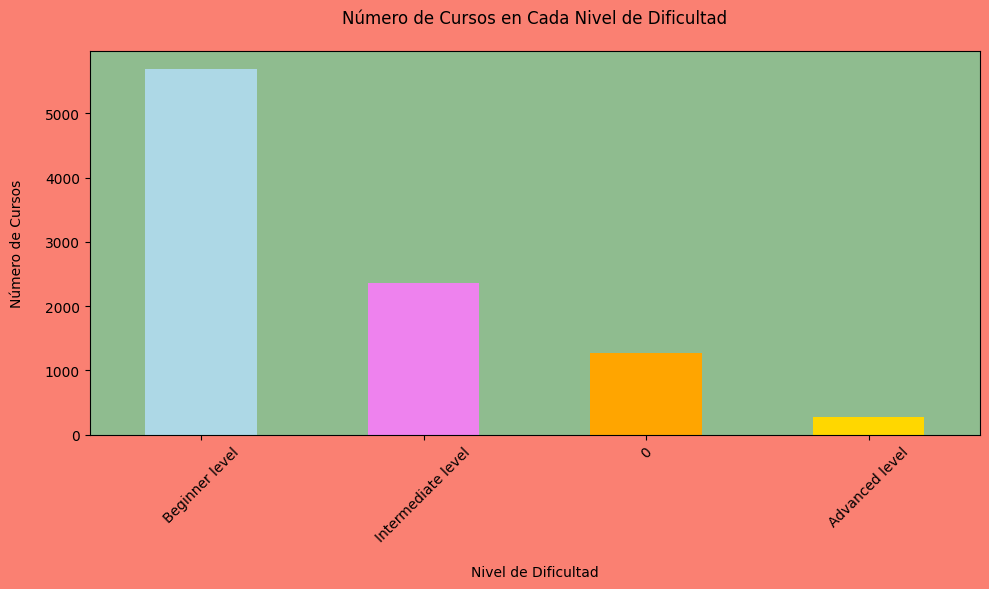

In [35]:
import matplotlib.pyplot as plt

# Cuenta el número de cursos en cada nivel de dificultad
nivel_dificultad_counts = df['Level'].value_counts()

# Paleta de colores
colors = ['lightblue', 'violet', 'orange', 'gold']

# Generando la gráfica de barras
plt.figure(figsize=(10, 6), facecolor='salmon')
plt.rcParams.update({'axes.facecolor': 'darkseagreen', 'figure.facecolor': 'lightgreen'})
nivel_dificultad_counts.plot(kind='bar', color=colors)
plt.title('Número de Cursos en Cada Nivel de Dificultad', pad=20)
plt.xlabel('Nivel de Dificultad', labelpad=15)
plt.ylabel('Número de Cursos', labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()

# Imprime la gráfica
plt.show()




## Análisis de la gráfica de barras

Podemos ver que la dificultad que predomina en los cursos es la `Beginner level`, y la que menos aparece es `Advanced level`. 

Ahora, aparece una columna llamada `0`, estos datos representan los cursos a los cuales no se les ha especificado una dificultad como tal. 

## Número de cursos en las principales categorías
Este reporte lo mostraremos con una gráfica de barras horizontal:

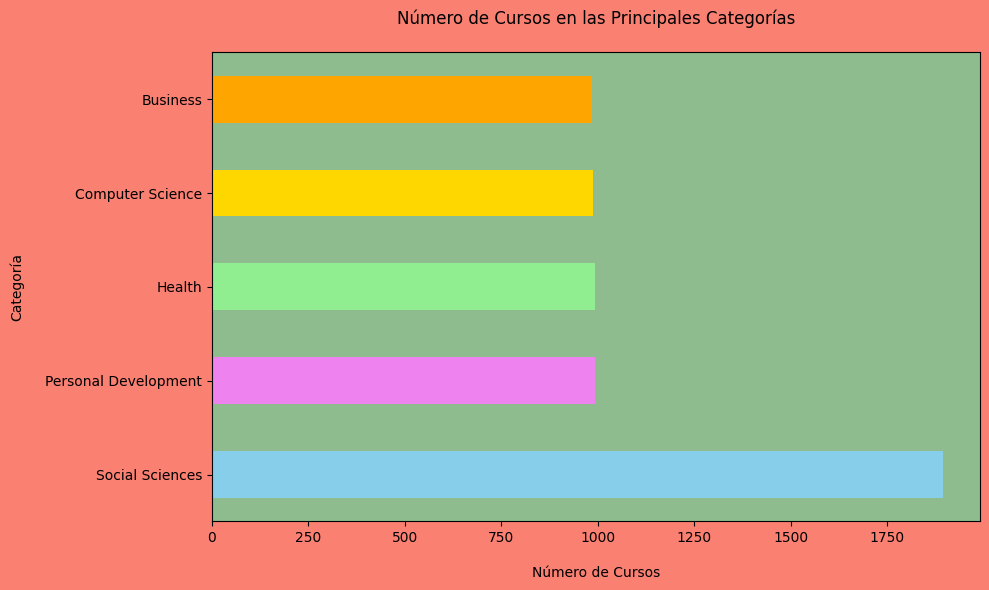

In [34]:
import matplotlib.pyplot as plt

# Cuenta el número de cursos por cada categoría
categorias_counts = df['Keyword'].value_counts().head(5)

# Paleta de colores
colors = ['skyblue', 'violet', 'lightgreen', 'gold', 'orange']

# Creando gráfica de barras horizontal
plt.figure(figsize=(10, 6), facecolor='salmon')
plt.rcParams.update({'axes.facecolor': 'darkseagreen', 'figure.facecolor': 'lightgreen'})
categorias_counts.plot(kind='barh', color=colors)
plt.title('Número de Cursos en las Principales Categorías', pad=20)
plt.xlabel('Número de Cursos', labelpad=15)
plt.ylabel('Categoría', labelpad=15)
plt.tight_layout()

# Imprime la gráfica
plt.show()


## Análisis de los cursos por sus principales categorías

Dado que es una gráfica de barras horizontal, es más fácil poder deducir los valors.

Tenemos que tanto las categorías de `Business`, `Computer Science`, `Health` y `Personal Development` comparten la cantidad de `1000` cursos. 

Y la categoría con más cursos es `Social Sciences` con una cantidad de más de `1750` cursos.

## Relación entre la duración del curso y el número de revisiones

Se nos presenta esta vez en forma de gráfico de dispersión.

Debido a que la columna `Duration` contiene texto aparte de los valores numéricos, necesitamos hacer una conversión de datos para poder realizar la gráfica. Este proceso se realizó al principio del documento, en el área de `Limpieza`.

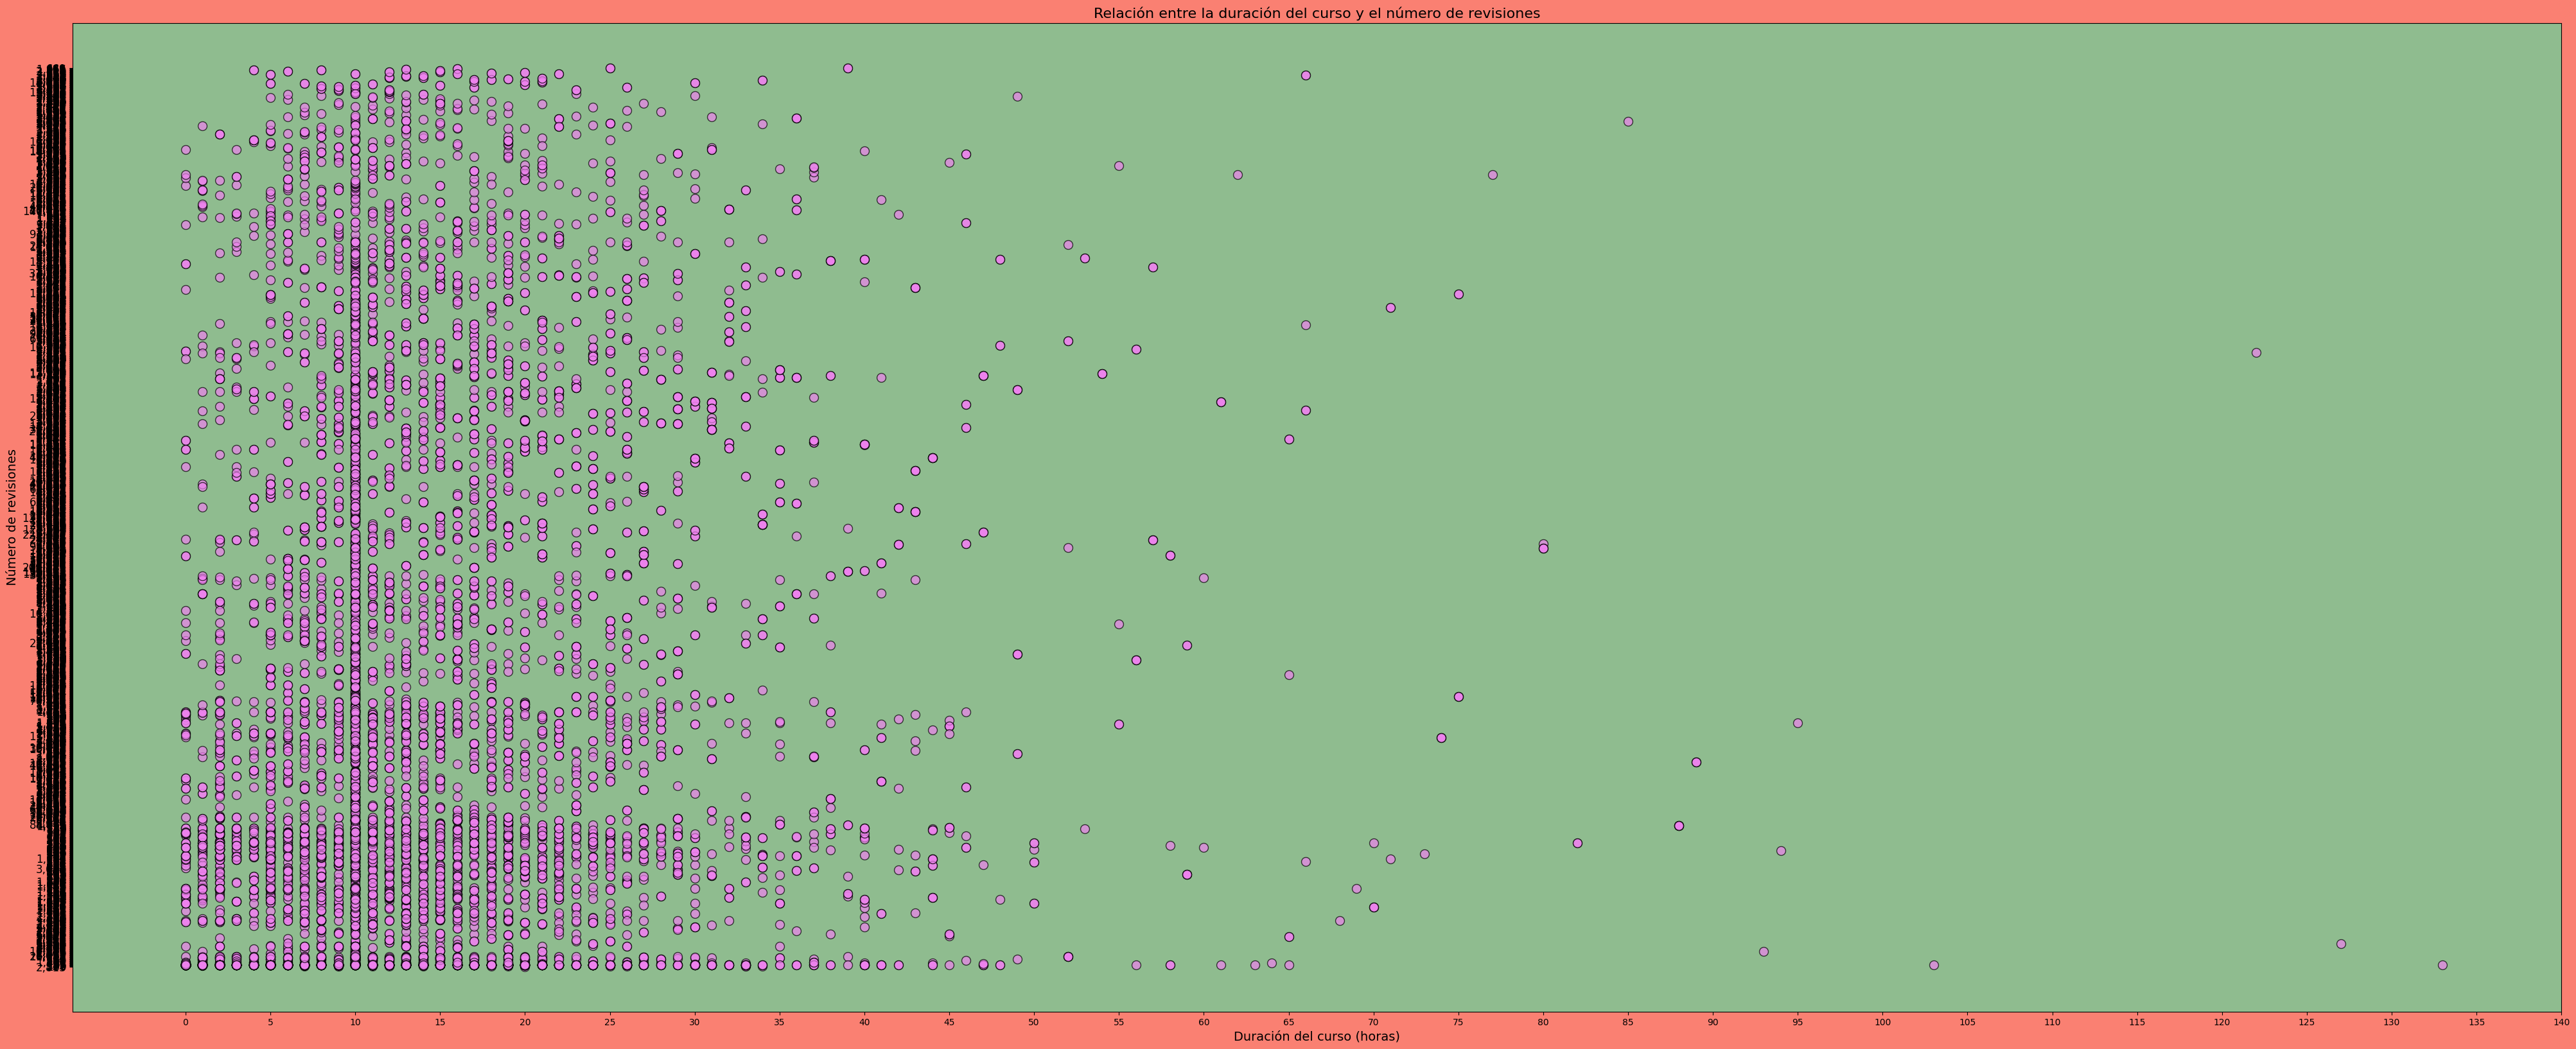

In [37]:
import matplotlib.pyplot as plt

# Creando el gráfico de dispersión
plt.figure(figsize=(50, 20), facecolor='salmon')
plt.rcParams.update({'axes.facecolor': 'darkseagreen', 'figure.facecolor': 'lightgreen'})
plt.scatter(df['Duration'], df['Review'], alpha=0.7, c='violet', edgecolors='black', s=100)
plt.title('Relación entre la duración del curso y el número de revisiones', fontsize=16)
plt.xlabel('Duración del curso (horas)', fontsize=14)
plt.ylabel('Número de revisiones', fontsize=14)
# Establecer intervalos de 5 horas en el eje x
plt.xticks(range(0, 145, 5))  
plt.yticks(fontsize=12)
plt.show()


## Análisis de la gráfica de dispersión
En la gráfica de dispersión podemos notar que la cantidad de vistas es mayor mientras el curso no sea de larga duración. Esto puede dar un indicio de que los usuarios prefieren el contenido de cursos no tan cargados.

# Creando histograma de la distribución de las duraciones de los cursos.

Para esta gáfica utilizamos la función `plt.hist()` con el conjunto de datos que tenemos cargados en la variable `df['Duration]`

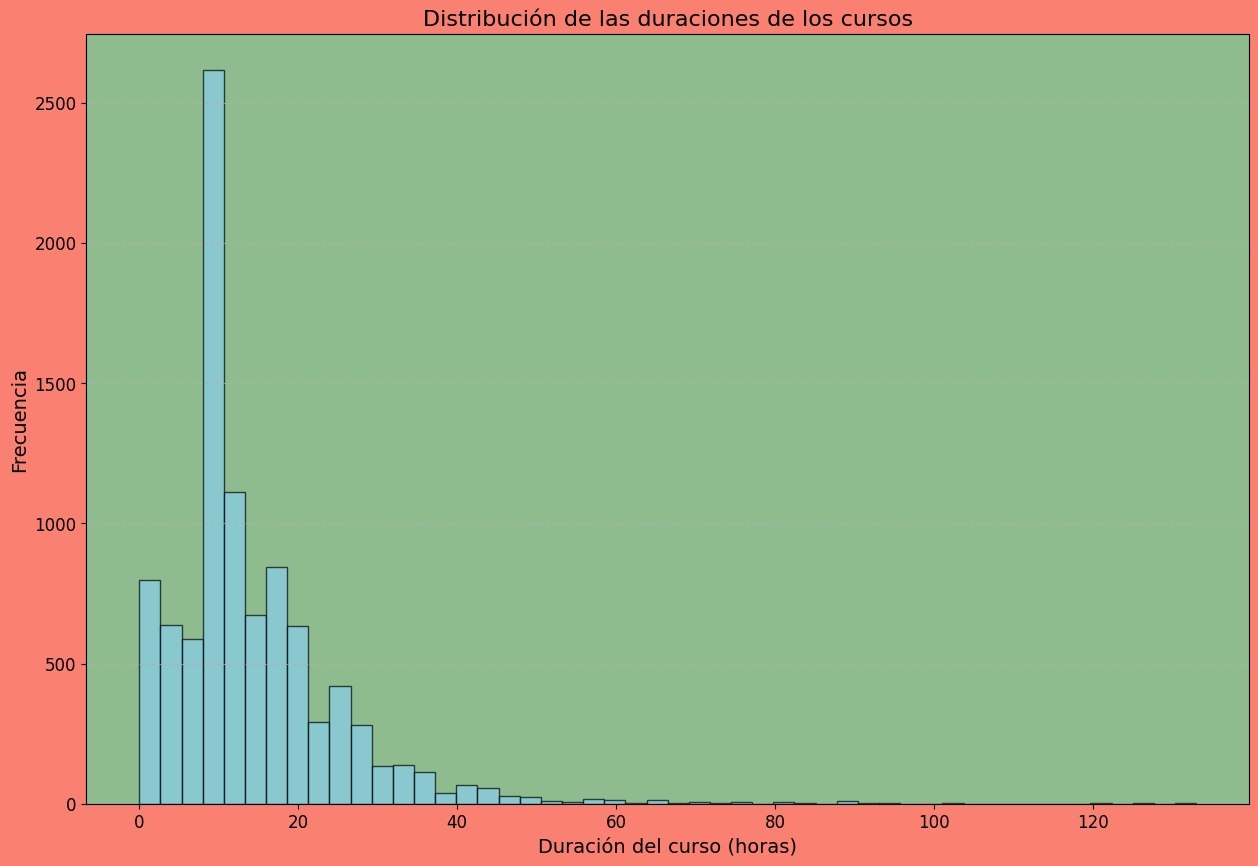

In [57]:
plt.figure(figsize=(15, 10), facecolor='salmon')
plt.hist(df['Duration'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.rcParams.update({'axes.facecolor': 'darkseagreen', 'figure.facecolor': 'lightgreen'})
plt.title('Distribución de las duraciones de los cursos', fontsize=16)
plt.xlabel('Duración del curso (horas)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




## Análisis Histograma de las duraciones de los cursos

Podemos visualizar que son pocos los cursos que exceden las 30 horas de duración.

Mientras que la mayoría de cursos, o al menos más de 2500 cursos, suelen durar menos de 10 horas aproximadamente.

En la plataforma se encuentran cursos muy cortos, de al menos 700 cursos que durarán de 0 a 5 horas.

# Creando gráfico de cajas para mostrar la distribución de las calificaciones de los cursos por nivel de dificultad.

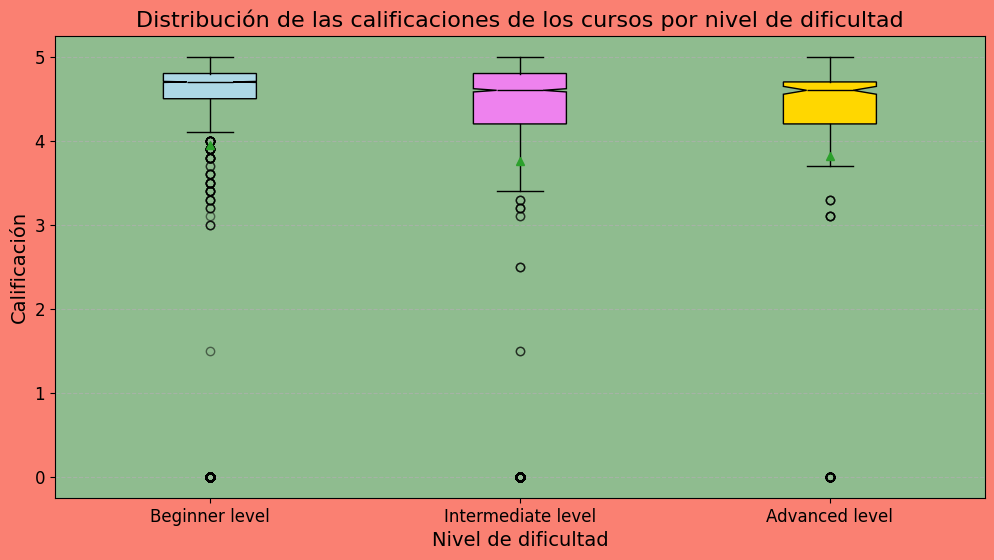

In [44]:
import matplotlib.pyplot as plt

colors = ['lightblue', 'violet', 'gold']

# Creando gráfico de cajas
plt.figure(figsize=(12, 6),  facecolor='salmon' )
bp = plt.boxplot([df[df['Level'] == 'Beginner level']['Rating'].dropna(),
                  df[df['Level'] == 'Intermediate level']['Rating'].dropna(),
                  df[df['Level'] == 'Advanced level']['Rating'].dropna()],
                 labels=['Beginner level', 'Intermediate level', 'Advanced level'],
                 notch=True, patch_artist=True, showmeans=True)

# Personalizar el color de las cajas
for box, color in zip(bp['boxes'], colors):
    box.set(color='black', linewidth=1)  # Borde de la caja
    box.set(facecolor=color)  # Color de la caja

# Personalizar el color de los "whiskers" (líneas verticales)
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1)

# Personalizar el color de los "caps" (líneas horizontales)
for cap in bp['caps']:
    cap.set(color='black', linewidth=1)

# Personalizar el color de las "medians" (líneas horizontales dentro de las cajas)
for median in bp['medians']:
    median.set(color='black', linewidth=1)

# Personalizar el color de los "fliers" (puntos fuera de las cajas)
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=0.5)

# Personalizar el gráfico
plt.title('Distribución de las calificaciones de los cursos por nivel de dificultad', fontsize=16)
plt.rcParams.update({'axes.facecolor': 'darkseagreen', 'figure.facecolor': 'blue'})
plt.xlabel('Nivel de dificultad', fontsize=14)
plt.ylabel('Calificación', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




## Análisis de la distribución de las calificaciones de los cursos por nivel de dificultad

Dado a que las medianas de las gráficas (la línea horizontal dentro de la caja) se encuentra dentro de los rangos verticales, se puede asumir que sus valores son bastante similares.

También se nos muestra que la dificultad con calificaciones más atópicas (con valores fuera de sus rangos) es `Beginner Level`.

La dificultad que muestra menos valores atópicos es `Advanced Level`, aunque recordemos que de esta dificultad hay menos cursos comparado con las otras dos categorías.

# Conclusión Generál del análisis realizado
Con estos resultados podemos concluir lo siguiente:

* La plataforma cuenta con más de 5,000 cursos de dificultad `Beginner level` para que los usuarios puedan comenzar sus estudios.
* La categoría que predomina en los cursos de la plataforma es `Social Sciences` con más de 1750 cursos.
* Los usuarios visualizan con mayor frecuencia los cursos con duración menor a 20 horas.
* En la plataforma predominan los cursos con menos de 20 horas de duración, específicamente entre las 8 y 11 horas.


# Conslusión sobre el uso de python para el análisis de datos
Python es un lenguaje bastante flexible y amigable para poder trabajar con el análisis de grandes cantidades de datos. Permite procesar datos de forma sencilla con las librerías `pandas` y `NumPy`.

Estos datos procesados pueden ser mostrados en distintas gráficas proporcionadas por la librería `Matplotlib`, la cual contiene gran cantidad de gráficos con opción de personalizarlos según sean requeridos por los analistas.

Por sí solas, las librerías son muy buenas, pero al combinarlas se pueden obtener resultados bastante potentes.

